<a href="https://colab.research.google.com/github/alexhuckabee/DS4E/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [3]:
dfhouse = pd.read_csv("/content/drive/MyDrive/DS4E/Data/Housing/house_prices.csv")

In [4]:
dfhouse.describe(include = "all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,2 Bruce St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


##Clean the data to remove NaN & null

In [5]:
dfhouse.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
dfhouse.shape

(13580, 21)

In [8]:
dfhouse2 = dfhouse.dropna()

In [9]:
dfhouse2.shape

(6196, 21)

#Going to add column to data frame for the calculated square footage of house

In [10]:
dfhouse2['PricePerSqFt']= round(dfhouse2['Price']/dfhouse2['BuildingArea'], 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
dfhouse2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqFt
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,13101.27
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,9766.67
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,11267.61
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,8933.33
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,15289.72


In [12]:
len(dfhouse2.Regionname.unique())

8

#Seem to be outliers in Data Set still - price per square foot cannot be infinite

In [21]:
dfhouse2['PricePerSqFt'].describe(include= 'all')

count    6196.0000
mean           inf
std            NaN
min       474.7000
25%      5774.5725
50%      7488.7900
75%      9437.3675
max            inf
Name: PricePerSqFt, dtype: float64

In [23]:
dfhouse2.sort_values(by = 'PricePerSqFt',ascending=False)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqFt
4344,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,2.0,1.0,1.0,215.0,0.0,2000.0,Melbourne,-37.79530,144.94370,Northern Metropolitan,6821.0,inf
11883,Balwyn,27 Burroughs Rd,5,h,3812000.0,S,VICProp,29/07/2017,7.9,3103.0,5.0,4.0,2.0,729.0,1.0,2012.0,Boroondara,-37.80600,145.09511,Southern Metropolitan,5682.0,3812000.00
11578,Ashwood,47B Vannam Dr,3,t,1060000.0,S,Buxton,22/07/2017,10.2,3147.0,3.0,2.0,2.0,343.0,1.0,2000.0,Monash,-37.86324,145.10289,Southern Metropolitan,2894.0,1060000.00
12017,Glen Iris,4/1508 Malvern Rd,2,t,955000.0,S,Jellis,29/07/2017,7.3,3146.0,2.0,1.0,1.0,197.0,1.0,1970.0,Stonnington,-37.85448,145.04850,Southern Metropolitan,10412.0,955000.00
2117,Collingwood,12/120 Cambridge St,2,u,1645000.0,S,Nelson,28/05/2016,1.6,3066.0,4.0,1.0,3.0,0.0,2.0,1890.0,Yarra,-37.80460,144.98580,Northern Metropolitan,4553.0,822500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,5.0,2.0,4.0,730.0,3112.0,1920.0,Boroondara,-37.84240,145.06390,Southern Metropolitan,8920.0,838.05
11470,Pakenham,4 Toorang Ct,4,h,435000.0,S,C21,15/07/2017,47.3,3810.0,4.0,2.0,2.0,553.0,553.0,2005.0,Cardinia,-38.08699,145.48273,Eastern Victoria,17384.0,786.62
7264,West Footscray,77 Suffolk St,2,h,495000.0,S,Burnham,24/09/2016,8.2,3012.0,2.0,1.0,2.0,161.0,700.0,1977.0,Maribyrnong,-37.79050,144.87140,Western Metropolitan,5058.0,707.14
12064,Lalor,52 Monash St,3,h,580500.0,S,Love,29/07/2017,16.3,3075.0,3.0,1.0,1.0,532.0,934.0,1980.0,Whittlesea,-37.66101,145.02568,Northern Metropolitan,8279.0,621.52


##Eliminate Buildings with areas less than 30 Ft^2 or areas greater than 1500 ft^2 to clean up data set

In [54]:
dfhouse3 = dfhouse2[~(dfhouse2.BuildingArea<30)]
dfhouse4 = dfhouse3[~(dfhouse3.BuildingArea>1500)]

In [58]:
dfhouse4.sort_values(by = 'PricePerSqFt',ascending=False)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqFt
2780,Glen Iris,26 Gardiner Pde,4,h,2975000.0,S,Marshall,10/12/2016,9.2,3146.0,4.0,3.0,4.0,0.0,30.0,1930.0,Boroondara,-37.85410,145.06430,Southern Metropolitan,10412.0,99166.67
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,76923.08
1722,Carnegie,1 Frogmore Rd,3,h,1600000.0,S,Woodards,7/05/2016,11.4,3163.0,4.0,2.0,2.0,751.0,40.0,1923.0,Glen Eira,-37.89450,145.06480,Southern Metropolitan,7822.0,40000.00
6745,Aberfeldie,2 May St,4,h,1200000.0,VB,Nelson,19/11/2016,9.1,3040.0,4.0,2.0,2.0,578.0,35.0,2010.0,Moonee Valley,-37.76140,144.89530,Western Metropolitan,1543.0,34285.71
995,Box Hill,6 Archibald St,3,h,4000000.0,VB,Lindellas,18/06/2016,13.1,3128.0,3.0,1.0,2.0,763.0,120.0,1945.0,Whitehorse,-37.81660,145.12150,Eastern Metropolitan,4605.0,33333.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,Sunshine North,35 Furlong Rd,3,h,591000.0,S,First,22/05/2016,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,Brimbank,-37.76230,144.82720,Western Metropolitan,4217.0,878.16
1805,Caulfield,30 Pyne St,4,h,131000.0,PI,Rodney,25/02/2017,8.9,3162.0,4.0,1.0,2.0,499.0,155.0,1920.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379.0,845.16
11470,Pakenham,4 Toorang Ct,4,h,435000.0,S,C21,15/07/2017,47.3,3810.0,4.0,2.0,2.0,553.0,553.0,2005.0,Cardinia,-38.08699,145.48273,Eastern Victoria,17384.0,786.62
7264,West Footscray,77 Suffolk St,2,h,495000.0,S,Burnham,24/09/2016,8.2,3012.0,2.0,1.0,2.0,161.0,700.0,1977.0,Maribyrnong,-37.79050,144.87140,Western Metropolitan,5058.0,707.14


##Plot Price vs. Date to see if any correlation present

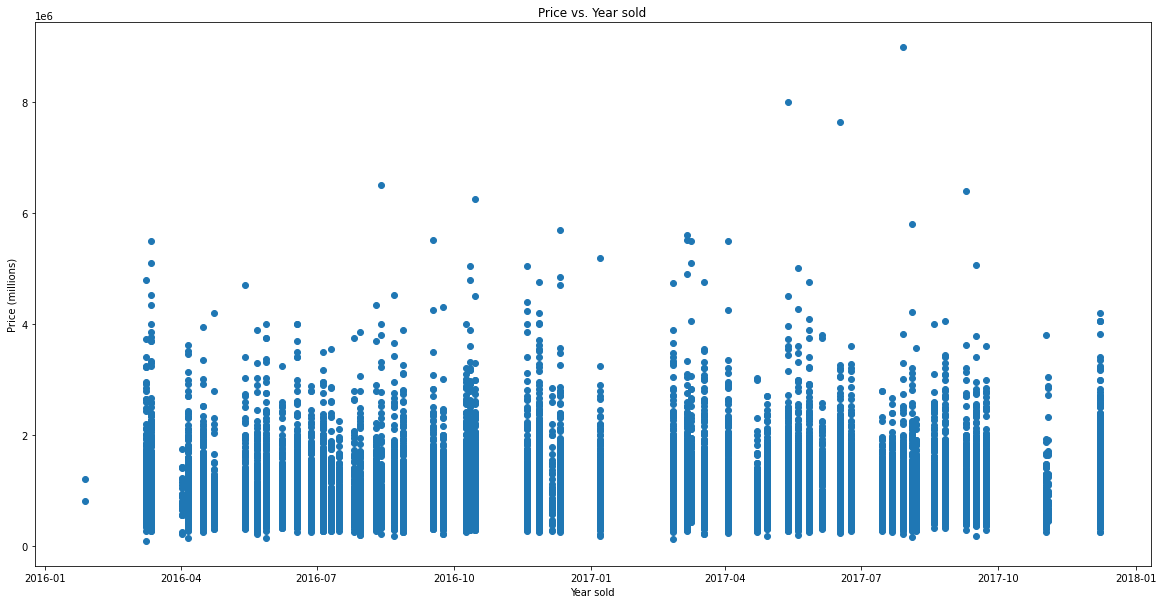

In [127]:
dfhouse['Date'] = pd.to_datetime(dfhouse['Date'])
X0 = dfhouse.loc[:,['Date']]
Y0 = dfhouse.loc[:, ['Price']]
mdlreg0 = LinearRegression().fit(X0, Y0)
plt.figure(figsize=(20,10))
plt.scatter(X0, Y0)
plt.title('Price vs. Year sold')
plt.xlabel('Year sold')
plt.ylabel('Price (millions)')

plt.show()

###No correlation present, home prices seem to stay within the saame ranges throughout the years

##Plot Price vs. Building Area to observe if any correlation present

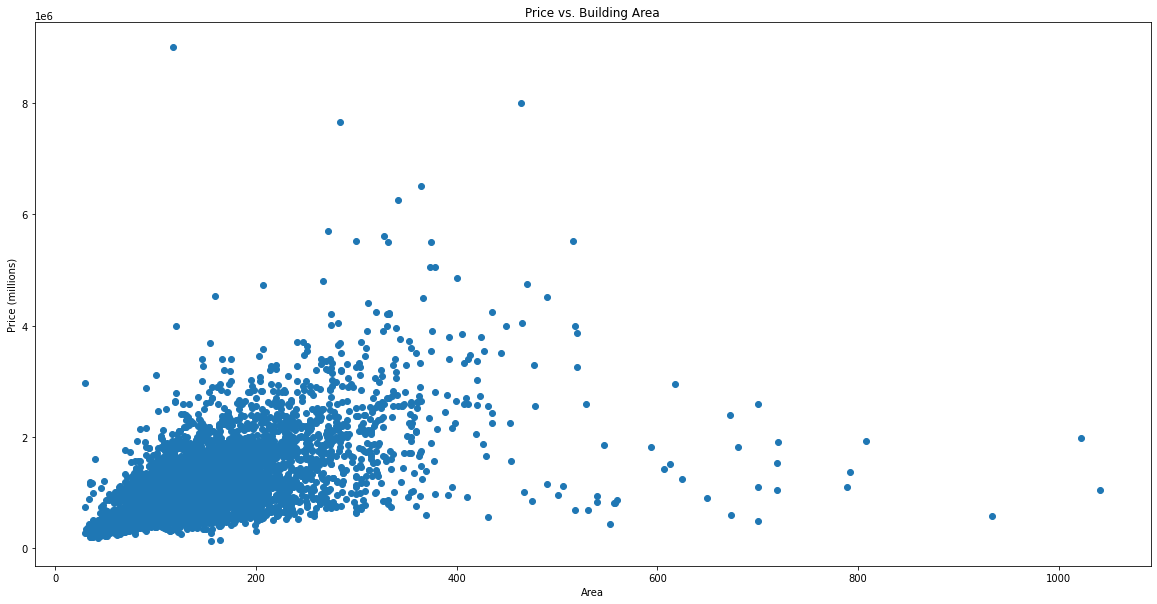

In [57]:
X1 = dfhouse4.loc[:,['BuildingArea']]
Y1 = dfhouse4.loc[:, ['Price']]
mdlreg1 = LinearRegression().fit(X1, Y1)
plt.figure(figsize=(20,10))
plt.scatter(X1, Y1)
plt.title('Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')

plt.show()

###As expected, the price of the home seems to be positively correlated with the building area
-- As building area surpasses the 500 ft^2 mark we see tthe price of the home start to deviate from the positive correlation
-- Will next examine price by regions

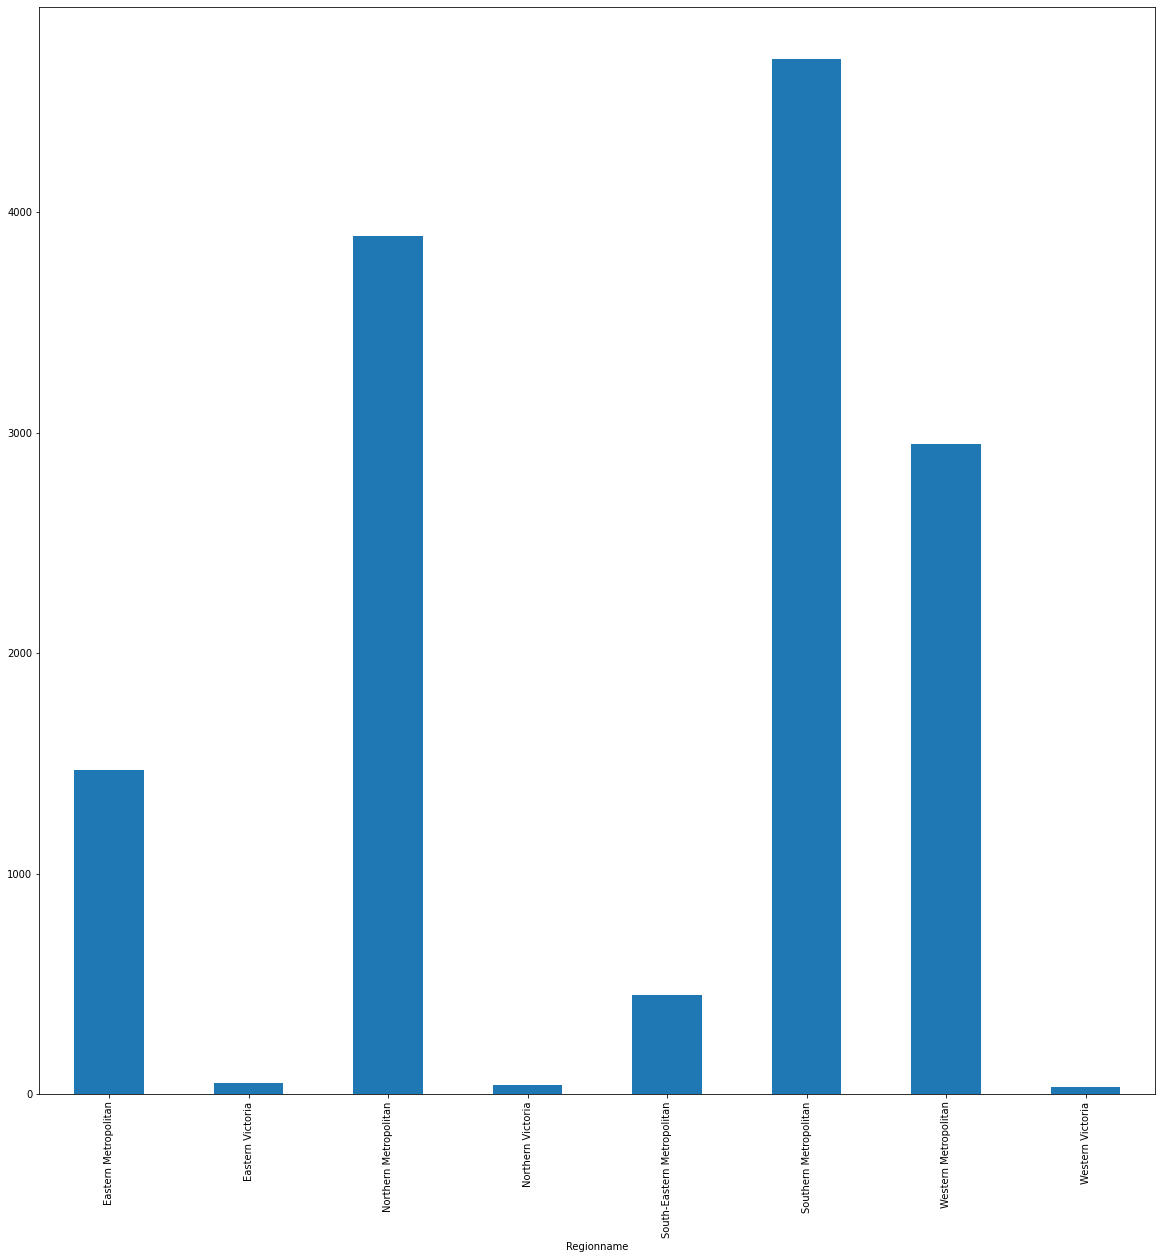

In [125]:
regions = dfhouse.groupby(['Regionname']).size().plot(figsize= (20,20),kind = "bar", )

#Majority of Data coming from Metropolitan Areas

In [72]:
regions = dfhouse4.groupby('Regionname')
df_smetro = regions.get_group("Southern Metropolitan")
df_nmetro = regions.get_group("Northern Metropolitan")
df_emetro = regions.get_group("Eastern Metropolitan")
df_wmetro = regions.get_group("Western Metropolitan")
df_evic = regions.get_group("Eastern Victoria")
df_nvic = regions.get_group("Northern Victoria")
df_wvic = regions.get_group("Western Victoria")
df_semetro = regions.get_group("South-Eastern Metropolitan")


In [163]:
df_smetro.sort_values(by='Longtitude')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqFt
4712,Port Melbourne,66 Dunstan Pde,4,h,1915000.0,S,Marshall,4/03/2017,3.8,3207.0,4.0,3.0,1.0,323.0,237.0,1935.0,Port Phillip,-37.83710,144.92100,Southern Metropolitan,8648.0,8080.17
4724,Port Melbourne,6/157 Beach St,2,u,1100000.0,SP,Cayzer,7/05/2016,3.8,3207.0,2.0,2.0,1.0,0.0,110.0,2006.0,Port Phillip,-37.83920,144.92570,Southern Metropolitan,8648.0,10000.00
4742,Port Melbourne,405/155 Beach St,2,u,1610000.0,S,Kay,10/12/2016,3.8,3207.0,2.0,2.0,2.0,0.0,104.0,2007.0,Port Phillip,-37.83920,144.92570,Southern Metropolitan,8648.0,15480.77
4708,Port Melbourne,366 Williamstown Rd,4,h,2105000.0,S,Cayzer,3/12/2016,3.8,3207.0,4.0,2.0,3.0,611.0,181.0,1940.0,Port Phillip,-37.83490,144.92660,Southern Metropolitan,8648.0,11629.83
4757,Port Melbourne,9 The Cove,3,h,1570000.0,S,Biggin,17/09/2016,3.8,3207.0,3.0,2.0,1.0,210.0,211.0,1999.0,Port Phillip,-37.83820,144.92720,Southern Metropolitan,8648.0,7440.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,Burwood,19 Pearce St,5,h,1225000.0,S,Buxton,29/04/2017,11.7,3125.0,5.0,1.0,2.0,633.0,182.0,1960.0,Whitehorse,-37.85570,145.12850,Southern Metropolitan,5678.0,6730.77
1519,Burwood,25 Greenwood St,4,h,1682000.0,S,Jellis,8/10/2016,11.7,3125.0,4.0,2.0,1.0,921.0,174.0,1950.0,Whitehorse,-37.84940,145.12910,Southern Metropolitan,5678.0,9666.67
1548,Burwood,6 Alimar Ct,4,h,1410000.0,S,Buxton,27/06/2016,11.7,3125.0,3.0,2.0,3.0,739.0,182.0,1970.0,Whitehorse,-37.85520,145.12920,Southern Metropolitan,5678.0,7747.25
9667,Notting Hill,1/3 Saniky St,3,u,840000.0,S,Barry,17/06/2017,16.7,3168.0,3.0,1.0,1.0,390.0,118.0,1970.0,Monash,-37.90354,145.14394,Southern Metropolitan,902.0,7118.64


In [164]:
df_nmetro.sort_values(by='Longtitude')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqFt
12202,Westmeadows,43 Bamford Av,4,h,821000.0,S,YPA,29/07/2017,16.5,3049.0,4.0,3.0,2.0,544.0,264.00,1997.0,Hume,-37.67841,144.87924,Northern Metropolitan,2474.0,3109.85
9379,Westmeadows,285 Mickleham Rd,3,h,540000.0,SP,Barry,3/06/2017,16.5,3049.0,3.0,1.0,2.0,532.0,122.00,1975.0,Hume,-37.67949,144.88349,Northern Metropolitan,2474.0,4426.23
9170,Greenvale,1 Chester Cl,3,h,680000.0,S,Barry,3/06/2017,20.4,3059.0,3.0,2.0,1.0,650.0,204.00,1990.0,Hume,-37.64049,144.88460,Northern Metropolitan,4864.0,3333.33
12203,Westmeadows,4 Pershore Ct,3,h,635000.0,S,Barry,29/07/2017,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,Hume,-37.68026,144.88468,Northern Metropolitan,2474.0,3587.57
9904,Greenvale,21 Destination Dr,4,h,840500.0,S,YPA,24/06/2017,20.4,3059.0,4.0,2.0,2.0,494.0,298.21,2014.0,Hume,-37.61424,144.88705,Northern Metropolitan,4864.0,2818.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,Greensborough,15 Carnon St,3,h,895000.0,S,Morrison,24/06/2017,16.1,3088.0,3.0,2.0,2.0,1036.0,132.00,1954.0,Banyule,-37.69538,145.11543,Northern Metropolitan,8524.0,6780.30
12025,Greensborough,50 Albion Cr,4,h,770000.0,PI,Darren,29/07/2017,16.1,3088.0,4.0,2.0,2.0,789.0,169.00,1975.0,Banyule,-37.69646,145.12163,Northern Metropolitan,8524.0,4556.21
12027,Greensborough,12 Yangoora Pl,4,h,900000.0,S,Morrison,29/07/2017,16.1,3088.0,4.0,3.0,1.0,807.0,190.00,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,8524.0,4736.84
9901,Greensborough,22 Yangoora Pl,4,h,925000.0,SP,Nelson,24/06/2017,16.1,3088.0,4.0,2.0,2.0,1070.0,190.00,1980.0,Banyule,-37.69999,145.12790,Northern Metropolitan,8524.0,4868.42


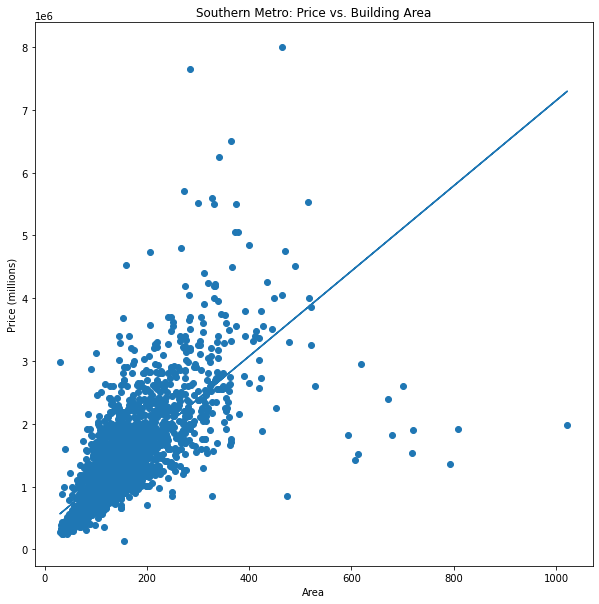

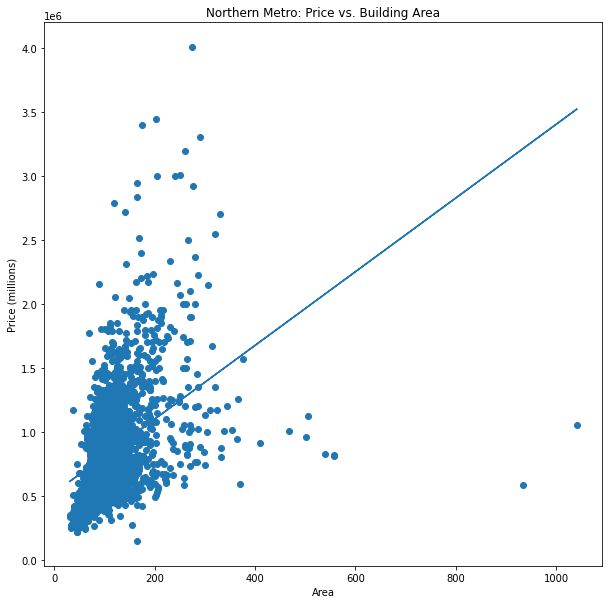

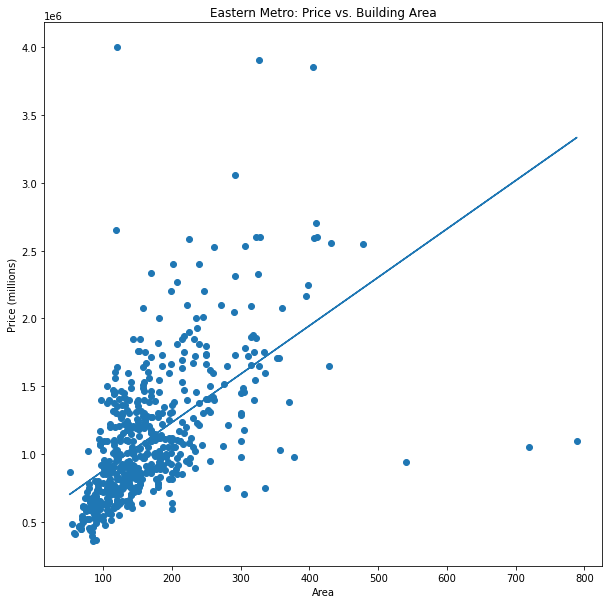

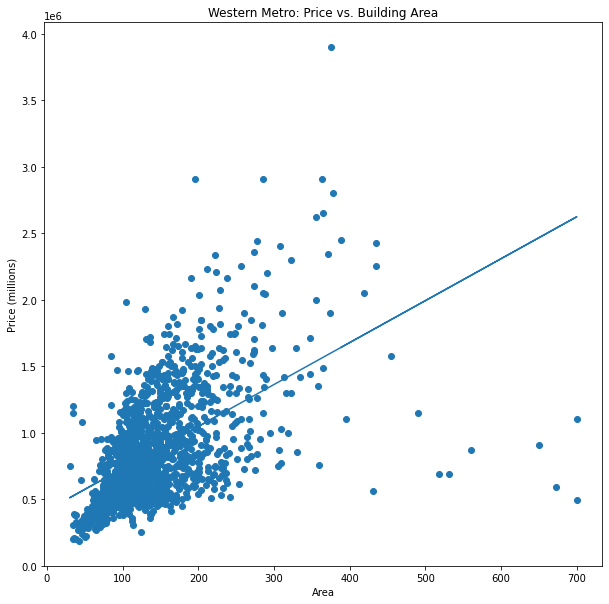

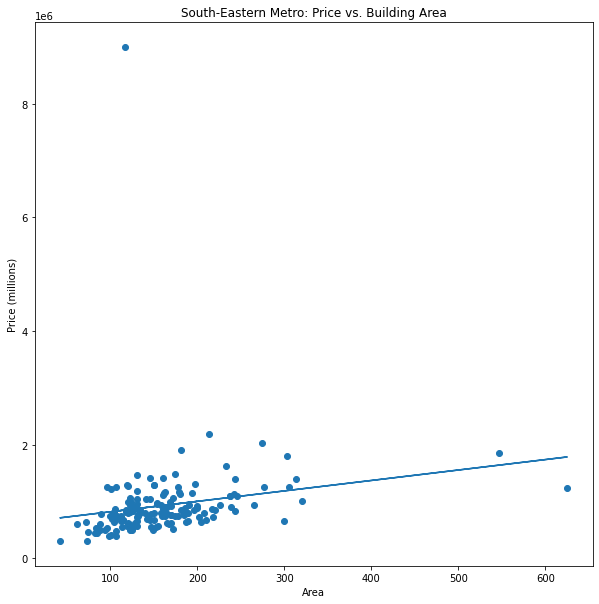

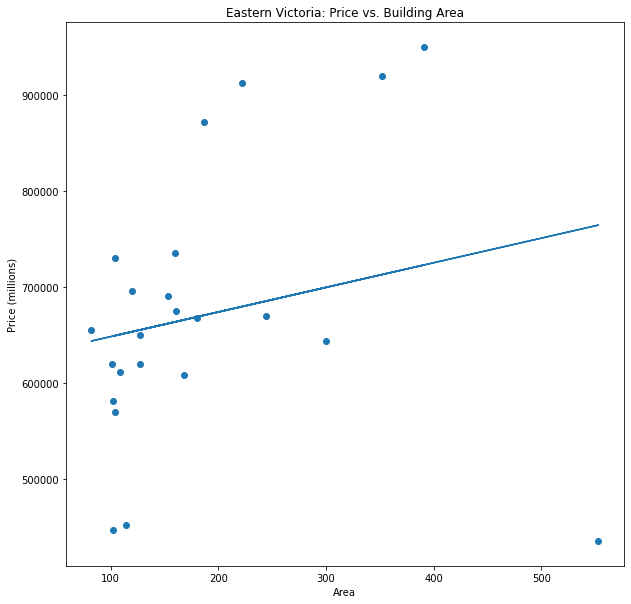

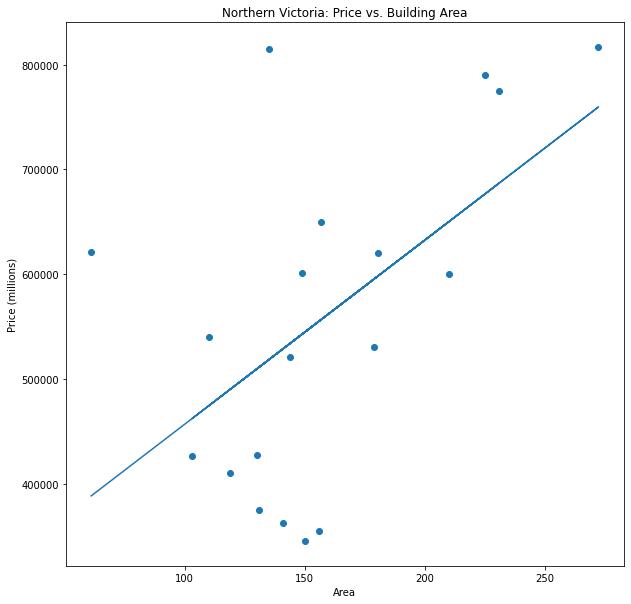

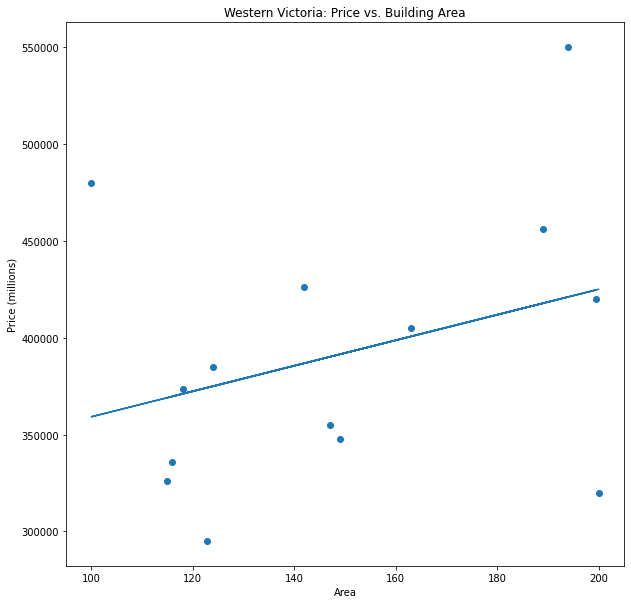

In [79]:


# South metro
X2 = df_smetro.loc[:,['BuildingArea']]
Y2 = df_smetro.loc[:, ['Price']]

mdlreg2 = LinearRegression().fit(X2, Y2)
plt.figure(figsize=(10,10))
plt.scatter(X2, Y2)
plt.plot(X2, mdlreg2.coef_*X2 + mdlreg2.intercept_)
plt.title('Southern Metro: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#North Metro
X3 = df_nmetro.loc[:,['BuildingArea']]
Y3 = df_nmetro.loc[:, ['Price']]

mdlreg3 = LinearRegression().fit(X3, Y3)
plt.figure(figsize=(10,10))
plt.scatter(X3, Y3)
plt.plot(X3, mdlreg3.coef_*X3 + mdlreg3.intercept_)
plt.title('Northern Metro: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#East Metro
X4 = df_emetro.loc[:,['BuildingArea']]
Y4 = df_emetro.loc[:, ['Price']]

mdlreg4 = LinearRegression().fit(X4, Y4)
plt.figure(figsize=(10,10))
plt.scatter(X4, Y4)
plt.plot(X4, mdlreg4.coef_*X4 + mdlreg4.intercept_)
plt.title('Eastern Metro: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#West Metro
X5 = df_wmetro.loc[:,['BuildingArea']]
Y5 = df_wmetro.loc[:, ['Price']]

mdlreg5 = LinearRegression().fit(X5, Y5)
plt.figure(figsize=(10,10))
plt.scatter(X5, Y5)
plt.plot(X5, mdlreg5.coef_*X5 + mdlreg5.intercept_)
plt.title('Western Metro: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#SE Metro
X6 = df_semetro.loc[:,['BuildingArea']]
Y6 = df_semetro.loc[:, ['Price']]

mdlreg6 = LinearRegression().fit(X6, Y6)
plt.figure(figsize=(10,10))
plt.scatter(X6, Y6)
plt.plot(X6, mdlreg6.coef_*X6 + mdlreg6.intercept_)
plt.title('South-Eastern Metro: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#East Victoria
X7 = df_evic.loc[:,['BuildingArea']]
Y7 = df_evic.loc[:, ['Price']]

mdlreg7 = LinearRegression().fit(X7, Y7)
plt.figure(figsize=(10,10))
plt.scatter(X7, Y7)
plt.plot(X7, mdlreg7.coef_*X7 + mdlreg7.intercept_)
plt.title('Eastern Victoria: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#North Victoria
X8 = df_nvic.loc[:,['BuildingArea']]
Y8 = df_nvic.loc[:, ['Price']]

mdlreg8 = LinearRegression().fit(X8, Y8)
plt.figure(figsize=(10,10))
plt.scatter(X8, Y8)
plt.plot(X8, mdlreg8.coef_*X8 + mdlreg8.intercept_)
plt.title('Northern Victoria: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()

#West Victoria
X9 = df_wvic.loc[:,['BuildingArea']]
Y9 = df_wvic.loc[:, ['Price']]

mdlreg9 = LinearRegression().fit(X9, Y9)
plt.figure(figsize=(10,10))
plt.scatter(X9, Y9)
plt.plot(X9, mdlreg9.coef_*X9 + mdlreg9.intercept_)
plt.title('Western Victoria: Price vs. Building Area')
plt.xlabel('Area')
plt.ylabel('Price (millions)')
plt.show()




#From the graphs above we make the following observations:
- A small percentage of our data concerns the Victoria Areas
- Majority of Data Centered in Metropolitan areas
-- Southern Metro seems to follow trend line fairly well
-- Northern Metro displays more straying from the trend as the price of house increases without increase in square footage
-- Eastern and Western Metro follow similar trend lines, data sets appear similar
-- South-Eastern Metro prices typically lower than the other Metropolitan areas
-- Victoria houses appear smaller and cheaper

#Give each region a binary value in their own column

In [80]:
dummies = pd.get_dummies(dfhouse4.Regionname)

In [81]:
dummies.head(10)

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0
11,0,0,1,0,0,0,0,0
12,0,0,1,0,0,0,0,0
15,0,0,1,0,0,0,0,0
16,0,0,1,0,0,0,0,0


In [85]:
dfhouse5 = pd.concat([dfhouse4,dummies], axis='columns')

In [86]:
dfhouse5.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqFt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,13101.27,0,0,1,0,0,0,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,9766.67,0,0,1,0,0,0,0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,11267.61,0,0,1,0,0,0,0,0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,8933.33,0,0,1,0,0,0,0,0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,15289.72,0,0,1,0,0,0,0,0


In [87]:
dfhouse6 = dfhouse5.drop('Regionname', axis='columns')

In [88]:
dfhouse6.shape

(6139, 29)

In [128]:

X = dfhouse6.drop(['Price', 'Address', 'Suburb','Type','Method','SellerG','CouncilArea','Date', 'Postcode'], axis='columns')
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,PricePerSqFt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,13101.27,0,0,1,0,0,0,0,0
2,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,9766.67,0,0,1,0,0,0,0,0
4,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,11267.61,0,0,1,0,0,0,0,0
6,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,8933.33,0,0,1,0,0,0,0,0
7,2,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,15289.72,0,0,1,0,0,0,0,0


In [129]:
y = dfhouse6.Price
y.head()


1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

Linear Regression Considering all numeric values still remaining in X

In [130]:
model = LinearRegression().fit(X,y)

In [131]:
model.coef_

array([ 1.06036140e+05, -1.11796912e+04,  1.88346663e+03,  1.14813915e+05,
        3.67573714e+04,  1.19165544e+01,  4.24906525e+03, -1.31089129e+03,
        8.27286830e+03,  1.82538821e+05,  4.35197089e-02,  1.03175980e+02,
       -2.61514960e+04, -1.03991327e+05, -6.36221090e+04,  7.63045349e+04,
        2.11012344e+04,  7.82263392e+04, -4.96815867e+04,  6.78144107e+04])

In [132]:
model.intercept_

-24377529.550177686

#Attempting to use train_test_split to find accuracy of the model

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4604, 21) (1535, 21) (4604,) (1535,)


In [122]:
yhat = model.predict(X_test)
print(yhat)

[ 921084.29658772  680861.4695415   581394.25186783 ... 1129914.38953517
 1198976.1041143  2757993.92765827]


In [124]:
yhat.shape

(1535,)

In [172]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,yhat)
print("r2 score is ",score)
print('mean_sqrd_error is==',mean_squared_error(y_test,yhat))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,yhat)))

r2 score is  0.7683035273961893
mean_sqrd_error is== 107797288450.33737
root_mean_squared error of is== 328324.9738450266


In [123]:
accuracy = model.score(X_test, y_test)
accurary = round(accuracy, 3)
print('Accuracy  is: '+str(accuracy))

Accuracy  is: 0.7683035273961893


Accuracy of machine learning model at about 75% so the model should be able to be used for a multiple linear regressions